# Regression Analysis

In this document, we perform Regression Analysis, particularly Linear Regression, for the data modeling portion of our project.

# Loading the data

First, we load the data from our [dataset](https://docs.google.com/spreadsheets/d/1jzNEJWQMvfK6aJeG28JSXecrLZfjeFOCYp-gtW0Q7LQ/edit#gid=1456408654) which we have made available online.

We display the last three records as shown in the output to ensure that we have obtained all data properly.

In [1]:
# Load datasets
import pandas as pd
import gspread
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="darkgrid", rc=custom_params, palette="pastel")

from IPython.display import display
from scipy.stats import zscore

sa = gspread.service_account(filename="group-28-dataset-7233caedfe09.json")
sheet = sa.open("Dataset - Group 28")
work_sheet = sheet.worksheet("Fixed Data")

df = pd.DataFrame(work_sheet.get_all_values())

new_header = df.iloc[0]
df = df[1:152]
df.columns = new_header
df = df.replace(r'^\s*$', np.nan, regex=True)

df.tail(3)

,ID,Timestamp,Tweet URL,Group,Collector,Category,Topic,Keywords,Account handle,Account name,...,Quote Tweets,Views,Rating,Reasoning,Remarks,Thread/Tweet Language,Add columns here,Add columns here,Reviewer,Review
149,28-149,18/04/2023 23:47:41,https://twitter.com/fenum9/status/137914056758...,28,"Pardiñas, Miguel",HLTH,"COVID-19 vaccines contain microchip, magnetic ...","""covid"" ""vaccine"" ""metal""",@fenum9,h♤yd$n 🧙‍♂️ 𓅃,...,0,NaN,NaN,Tells that nurse on duty during vaccine appoin...,No location,Foreign,NaN,NaN,NaN,NaN
150,28-150,18/04/2023 23:54:57,https://twitter.com/Wengsterrr_/status/1371652...,28,"Pardiñas, Miguel",HLTH,"COVID-19 vaccines contain microchip, magnetic ...","""bakuna"" ""tubig""",@Wengsterrr_,𝕃𝕦𝕒𝕟𝕟 𝕃𝕚 👅,...,0,NaN,NaN,"Complains why cases went up, and points that p...",Location might be fake,Filipino,NaN,NaN,NaN,NaN
151,28-151,18/04/2023 23:59:24,https://twitter.com/AdrianSBanal/status/141888...,28,"Pardiñas, Miguel",HLTH,"COVID-19 vaccines contain microchip, magnetic ...","""bakuna"" ""tubig""",@AdrianSBanal,Nabs,...,0,NaN,NaN,"Complains that vaccine might not be working, a...",NaN,Filipino,NaN,NaN,NaN,NaN


Shown here are all the current features of the dataset.

This may include features with missing values.

In [2]:
print("List all current features:")
df.columns

List all current features:


Index(['ID', 'Timestamp', 'Tweet URL', 'Group', 'Collector', 'Category',
       'Topic', 'Keywords', 'Account handle', 'Account name', 'Account bio',
       'Account type', 'Joined', 'Following', 'Followers', 'Location', 'Tweet',
       'Tweet Translated', 'Tweet Type', 'Date posted', 'Screenshot',
       'Content type', 'Likes', 'Replies', 'Retweets', 'Quote Tweets', 'Views',
       'Rating', 'Reasoning', 'Remarks', 'Thread/Tweet Language',
       'Add columns here', 'Add columns here', 'Reviewer', 'Review'],
      dtype='object', name=0)

In [3]:
print("Display the number of records and features:")
df.shape

Display the number of records and features:


(151, 35)

# Checking for missing values

Now, we check which features has no missing values.

From, here we can see that there are missing value on Account Bio, Location, Screenshot, etc.

In [4]:
print("Check for features with missing values:")
df.columns[df.isna().any()].tolist()

Check for features with missing values:


['Account bio',
 'Location',
 'Screenshot',
 'Quote Tweets',
 'Views',
 'Rating',
 'Remarks',
 'Add columns here',
 'Add columns here',
 'Reviewer',
 'Review']

Upon checking, the collectors deemed that the only necessary features for this project are as follows:

`['ID', 'Timestamp', 'Tweet URL', 'Group', 'Keywords', 'Account handle', 'Account name', 'Account bio', 'Account type',
'Tweet', 'Tweet Translated', 'Tweet Type', 'Date posted',
'Content type', 'Reasoning', 'Thread/Tweet Language',]`

From the previous output, we can verify that all of these features have no missing value.

In [5]:
print("Dataset summary:")
df_clean = df[['ID', 'Timestamp', 'Tweet URL', 'Group', 'Keywords',
         'Account handle', 'Account name', 'Account bio', 'Account type',
         'Tweet', 'Tweet Translated', 'Tweet Type', 'Date posted',
         'Content type', 'Reasoning', 'Thread/Tweet Language',]]
df_clean.tail(4)

Dataset summary:


,ID,Timestamp,Tweet URL,Group,Keywords,Account handle,Account name,Account bio,Account type,Tweet,Tweet Translated,Tweet Type,Date posted,Content type,Reasoning,Thread/Tweet Language
148,28-148,18/04/2023 23:43:56,https://twitter.com/HatzPurp/status/1385080074...,28,"""covid"" ""vaccine"" ""metal""",@HatzPurp,Hatz Purp,Versatile,Anonymous,Covid-19 is a man-made Virus released on the p...,Covid-19 is a man-made Virus released on the p...,"Text, Reply",22/04/21 11:56,Rational,Says that covid is man-made to make the public...,Foreign
149,28-149,18/04/2023 23:47:41,https://twitter.com/fenum9/status/137914056758...,28,"""covid"" ""vaccine"" ""metal""",@fenum9,h♤yd$n 🧙‍♂️ 𓅃,tall glass of yogurt,Anonymous,Was just waiting to get COVID vaccine and the ...,Was just waiting to get COVID vaccine and the ...,Text,6/4/21 2:35,Emotional,Tells that nurse on duty during vaccine appoin...,Foreign
150,28-150,18/04/2023 23:54:57,https://twitter.com/Wengsterrr_/status/1371652...,28,"""bakuna"" ""tubig""",@Wengsterrr_,𝕃𝕦𝕒𝕟𝕟 𝕃𝕚 👅,— ɪ’ᴍ ᴀ ᴘᴀʀᴀᴅᴏx.,Anonymous,"Kung kelan nagkaroon ng bakuna kontra COVID, t...","When there was a vaccine against COVID, positi...",Text,16/03/21 10:41,Emotional,"Complains why cases went up, and points that p...",Filipino
151,28-151,18/04/2023 23:59:24,https://twitter.com/AdrianSBanal/status/141888...,28,"""bakuna"" ""tubig""",@AdrianSBanal,Nabs,Malas lang,Anonymous,Taenang bakuna walang epekto tubig baha lang a...,"Taenang vaccine has no effect, it's just flood...",Text,24/07/21 19:01,Emotional,"Complains that vaccine might not be working, a...",Filipino


The table shows a simple summary of our clean dataset. Some notable observations are as follows:


*   ID, Tweet URL, Tweet, and Tweet Translated have unique values.
*   82 out of 151 tweets are of Emotional content type.
*   There are 78 Foreign Tweets. This also implies that the remaining 73 tweets are Filipino Tweets.
*   Ven Cuenca has four tweets on this dataset.

# Ensuring formatting consistency

For this subsection, we will check formatting consistency of some features.

For timestamp, we ensured that the data type is datetime. By default, the format of datetime in Pandas is YYYY-MM-DD HH:MM:SS.

In [6]:
df_clean.loc[0:151, "Timestamp"] = pd.to_datetime(df_clean["Timestamp"], format='%d/%m/%Y %H:%M:%S').copy()
df_clean["Timestamp"].apply(pd.to_datetime)

1     2023-02-27 13:34:22
2     2023-02-27 13:40:42
3     2023-03-03 03:23:13
4     2023-03-03 03:31:35
5     2023-03-03 03:43:09
              ...        
147   2023-04-18 23:41:34
148   2023-04-18 23:43:56
149   2023-04-18 23:47:41
150   2023-04-18 23:54:57
151   2023-04-18 23:59:24
Name: Timestamp, Length: 151, dtype: datetime64[ns]

For date posted, we ensured that the data type is datetime. By default, the format of datetime in Pandas is YYYY-MM-DD HH:MM:SS.

In [7]:
df_clean.loc[0:151, "Date posted"] = pd.to_datetime(df_clean["Date posted"], format='%d/%m/%y %H:%M').copy()
df_clean["Date posted"].apply(pd.to_datetime)

1     2021-08-24 19:34:00
2     2021-08-20 13:59:00
3     2021-08-14 21:35:00
4     2021-08-09 20:12:00
5     2021-08-04 15:54:00
              ...        
147   2021-03-02 19:07:00
148   2021-04-22 11:56:00
149   2021-04-06 02:35:00
150   2021-03-16 10:41:00
151   2021-07-24 19:01:00
Name: Date posted, Length: 151, dtype: datetime64[ns]

# Linear Regression

For linear regression, the group intends to observe what timeframes have high frequencies of posted tweets.

To obtain this, we create a new featured named `Count` as a part of our data.

`Count` is the number of tweets posted in a given time.

In [8]:
df_dates = pd.DataFrame({"Date": df_clean["Date posted"].apply(pd.to_datetime), "Count":1})
df_dates

,Date,Count
1,2021-08-24 19:34:00,1
2,2021-08-20 13:59:00,1
3,2021-08-14 21:35:00,1
4,2021-08-09 20:12:00,1
5,2021-08-04 15:54:00,1
...,...,...
147,2021-03-02 19:07:00,1
148,2021-04-22 11:56:00,1
149,2021-04-06 02:35:00,1
150,2021-03-16 10:41:00,1


Here, we employ the binning technique via grouping, to sum counts in a semimonthly manner.

We can also confirm that `Count` sums to 151 tweets in total.

In [9]:
df_dates_binned = df_dates.groupby(pd.Grouper(key="Date", freq="SMS")).sum()

df_dates_binned.reset_index(inplace=True)
df_dates_binned.columns = ['Date', 'Count']

display(df_dates_binned)

print(f"Sum of 'Count': {df_dates_binned['Count'].sum()}")

,Date,Count
0,2020-01-15,1
1,2020-02-01,0
2,2020-02-15,0
3,2020-03-01,1
4,2020-03-15,1
...,...,...
66,2022-10-15,1
67,2022-11-01,0
68,2022-11-15,1
69,2022-12-01,8


Sum of 'Count': 151


Here, let us describe our `df_dates_binned` dataset

In [10]:
df_dates_binned.describe()

,Date,Count
count,71,71.000000
mean,2021-07-01 01:00:50.704225280,2.126761
min,2020-01-15 00:00:00,0.000000
25%,2020-10-08 00:00:00,0.000000
50%,2021-07-01 00:00:00,1.000000
75%,2022-03-23 12:00:00,2.500000
max,2022-12-15 00:00:00,14.000000
std,NaN,2.975757


Now, we add additional columns to track year, month, and date to our `df_dates_binned` dataset.



In [11]:
df_dates_binned['Date'] = pd.to_datetime(df_dates_binned['Date'])
df_dates_binned['Year'] = df_dates_binned['Date'].dt.year
df_dates_binned['Month'] = df_dates_binned['Date'].dt.month
df_dates_binned['Day'] = df_dates_binned['Date'].dt.day
df_dates_binned.head()

,Date,Count,Year,Month,Day
0,2020-01-15,1,2020,1,15
1,2020-02-01,0,2020,2,1
2,2020-02-15,0,2020,2,15
3,2020-03-01,1,2020,3,1
4,2020-03-15,1,2020,3,15


# Visualize Data

We now visualize our `df_dates_binned` dataset

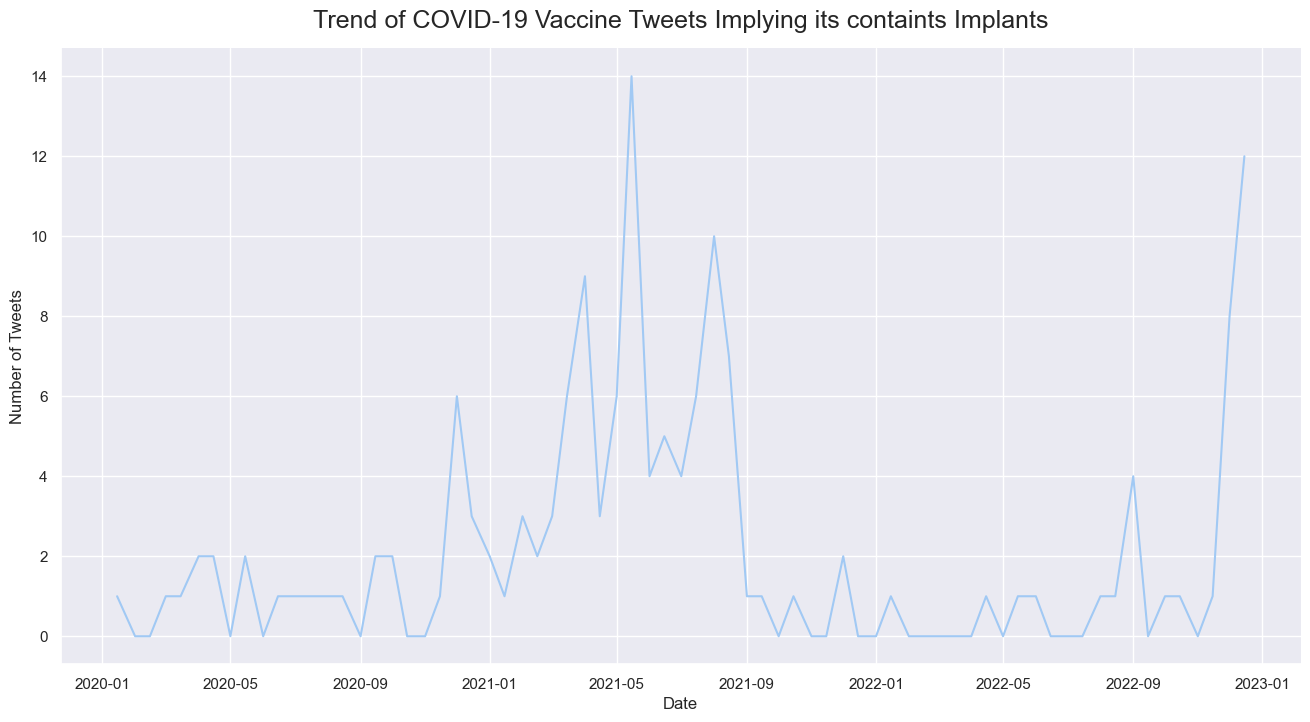

In [12]:
# Plot data (entire)
plt.figure(figsize=(16, 8))
sns.lineplot(data=df_dates_binned, x="Date", y="Count")

# Format plot
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.title('Trend of COVID-19 Vaccine Tweets Implying its containts Implants', size=18, y=1.02)

# Show the plot
plt.show()

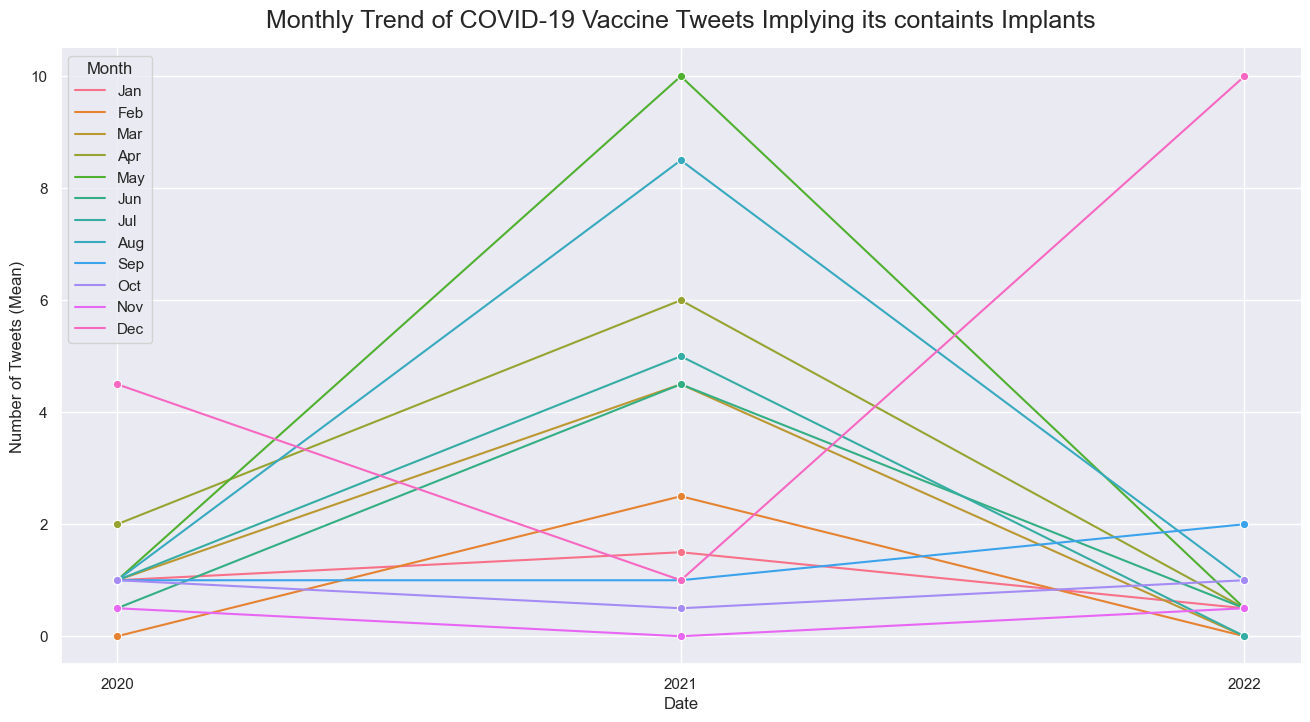

In [13]:
# Plot data (monthly)
import calendar
d = dict(enumerate(calendar.month_abbr))
df_dates_binned_m = df_dates_binned.groupby(['Year','Month'])['Count'].mean().reset_index()
df_dates_binned_m['Month'] = df_dates_binned_m['Month'].map(d)

plt.figure(figsize=(16, 8))
g = sns.lineplot(data=df_dates_binned_m, x='Year', y='Count', hue='Month',
                 marker="o")

# Format plot
plt.ticklabel_format(style='plain', axis='y')
g.set_xticks([2020, 2021, 2022])

plt.xlabel('Date')
plt.ylabel('Number of Tweets (Mean)')
plt.title('Monthly Trend of COVID-19 Vaccine Tweets Implying its containts Implants', size=18, y=1.02)

# Show the plot
plt.show()

# Perform Linear Regression

In [98]:
## Perform regression modeling
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import statsmodels.api as sm

# Convert datetime to int
x = df_dates_binned['Date'].astype('int64') / 10**9  # Convert to seconds (UNIX epoch start)
x_before_vaccine = x.loc[:23].tail(24)
x_during_release = x.loc[:38].tail(16)
x_after_release = x.loc[:69].tail(33)

x = x.values.reshape(-1, 1)
x_before_vaccine = x_before_vaccine.values.reshape(-1, 1)
x_during_release = x_during_release.values.reshape(-1, 1)
x_after_release = x_after_release.values.reshape(-1, 1)

y = df_dates_binned['Count'].loc[:69]
y_b = df_dates_binned['Count'].loc[:23].tail(24)
y_d = df_dates_binned['Count'].loc[:38].tail(16)
y_a = df_dates_binned['Count'].loc[:69].tail(33)
#--------------------------------------------------------------
# Linear regression model
#--------------------------------------------------------------
# Stastical approach
x_b = sm.add_constant(x_before_vaccine)
x_d = sm.add_constant(x_during_release)
x_a = sm.add_constant(x_after_release)

linear_model_stat_b = sm.OLS(y_b, x_b)
linear_model_stat_d = sm.OLS(y_d, x_d)
linear_model_stat_a = sm.OLS(y_a, x_a)

lms_results_b = linear_model_stat_b.fit()
lms_results_d = linear_model_stat_d.fit()
lms_results_a = linear_model_stat_a.fit()

p_values_b = lms_results_b.pvalues[1:]
p_values_d = lms_results_d.pvalues[1:]
p_values_a = lms_results_a.pvalues[1:]

# Machine learning approach (no p-values)

linear_model_b = LinearRegression()
linear_model_b.fit(x_b, y_b)
y_linear_pred_b = linear_model_b.predict(x_b)

linear_model_d = LinearRegression()
linear_model_d.fit(x_d, y_d)
y_linear_pred_d = linear_model_d.predict(x_d)

linear_model_a = LinearRegression()
linear_model_a.fit(x_a, y_a)
y_linear_pred_a = linear_model_a.predict(x_a)

# Calculate R2 and RMSE for linear regression model
linear_r2_b = r2_score(y_b, y_linear_pred_b)
linear_rmse_b = np.sqrt(mean_squared_error(y_b, y_linear_pred_b))

linear_r2_d = r2_score(y_d, y_linear_pred_d)
linear_rmse_d = np.sqrt(mean_squared_error(y_d, y_linear_pred_d))

linear_r2_a = r2_score(y_a, y_linear_pred_a)
linear_rmse_a = np.sqrt(mean_squared_error(y_a, y_linear_pred_a))

print("Model Evaluation - Machine Learning")
print("Linear Regression - Before Release : RMSE=%.2f, R2=%.2f" % (linear_rmse_b, linear_r2_b))
print("Linear Regression - Vaccine Release : RMSE=%.2f, R2=%.2f" % (linear_rmse_d, linear_r2_d))
print("Linear Regression - 70%% Vaxxed in MM : RMSE=%.2f, R2=%.2f" % (linear_rmse_a, linear_r2_a))

print("\nModel Evaluation - Linear Regression")
for i, p_value_b in enumerate(p_values_b.index): print(f'Before Release - P({p_value_b}): {p_values_b[i]}')
if any(p_values_b <= 0.05): print("There is a significant relationship between the predictor and the response\n")
else: print("There is no significant relationship between the predictor and the response\n")

for i, p_value_d in enumerate(p_values_d.index): print(f'Vaccine Release - P({p_value_d}): {p_values_d[i]}')
if any(p_values_d <= 0.05): print("There is a significant relationship between the predictor and the response\n")
else: print("There is no significant relationship between the predictor and the response\n")

for i, p_value_a in enumerate(p_values_a.index): print(f'70% Vaxxed in MM - P({p_value_a}): {p_values_a[i]}')
if any(p_values_a <= 0.05): print("There is a significant relationship between the predictor and the response\n")
else: print("There is no significant relationship between the predictor and the response\n")


# Plot the model
import plotly.graph_objects as go

xtt = df_dates_binned['Date'].loc[:69].dt.strftime('%Y-%m-%d')
scatter_actual = go.Scatter(x=xtt, y=y, mode='markers', name='Actual', marker=dict(color='blue', opacity=0.3))

xb = df_dates_binned['Date'].loc[:23].tail(24).dt.strftime('%Y-%m-%d')
line_regression_b = go.Scatter(x=xb, y=y_linear_pred_b, mode='lines', name='LR Before Release', line=dict(color='red', dash='dash'))

xd = df_dates_binned['Date'].loc[:38].tail(16).dt.strftime('%Y-%m-%d')
line_regression_d = go.Scatter(x=xd, y=y_linear_pred_d, mode='lines', name='LR Vaccine Release', line=dict(color='green', dash='dash'))

xa = df_dates_binned['Date'].loc[:69].tail(33).dt.strftime('%Y-%m-%d')
line_regression_a = go.Scatter(x=xa, y=y_linear_pred_a, mode='lines', name='LR 70% Vaxxed in MM', line=dict(color='orange', dash='dash'))

data = [scatter_actual, line_regression_b, line_regression_d, line_regression_a]

layout = go.Layout(xaxis=dict(title='Date'),
                   yaxis=dict(title='Tweet Count'),
                   title='Linear Regression Model for Twitter COVID-19 Vaccine Tweets Containg Implants',
                   showlegend=True,
                   height=600)

fig = go.Figure(data=data, layout=layout)
fig.show()

Model Evaluation - Machine Learning
Linear Regression - Before Release : RMSE=1.20, R2=0.15
Linear Regression - Vaccine Release : RMSE=2.79, R2=0.29
Linear Regression - 70% Vaxxed in MM : RMSE=2.38, R2=0.01

Model Evaluation - Linear Regression
Before Release - P(x1): 0.060853885146373424
There is no significant relationship between the predictor and the response

Vaccine Release - P(x1): 0.03082298452329453
There is a significant relationship between the predictor and the response

70% Vaxxed in MM - P(x1): 0.5040974613627096
There is no significant relationship between the predictor and the response



# Support Vector Regression

In [101]:
## Perform regression modeling
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

# Convert datetime to int
x = df_dates_binned['Date'].loc[:69].astype('int64') / 10**9  # Convert to seconds (UNIX epoch start)
x = x.values.reshape(-1, 1)

y = df_dates_binned['Count'].loc[:69]

#--------------------------------------------------------------
# SVR model with hyperparameter optimization
#--------------------------------------------------------------
# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a pipeline with StandardScaler and SVR
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('svr', SVR(kernel='rbf'))])

# Define the parameter grid for hyperparameter optimization
param_grid = {'svr__C': [10000, 1000000, 100],
              'svr__gamma': [10, 1000, 100]}
# param_grid = {'svr__C': [100, 1000, 100],
#               'svr__gamma': [1, 1000, 100]}

# Perform grid search with cross-validation on train data
grid_search = GridSearchCV(pipeline, param_grid)
grid_search.fit(x_train, y_train)

# Predict using best model on test data
best_svr = grid_search.best_estimator_
y_svr_pred_test = best_svr.predict(x_test)

# Calculate R2 and RMSE for SVR model
svr_r2 = r2_score(y_test, y_svr_pred_test)
svr_rmse = np.sqrt(mean_squared_error(y_test, y_svr_pred_test))

print("Model Evaluation")
print("\nSupport Vector Regression: RMSE=%.2f, R2=%.2f" % (svr_rmse, svr_r2))
print("Hyperparameters:", best_svr, "\n")

# Plot the model
import plotly.graph_objects as go

xtt = df_dates_binned['Date'].loc[:69].dt.strftime('%Y-%m-%d')
scatter_actual = go.Scatter(x=xtt, y=y, mode='markers', name='Actual', marker=dict(color='blue', opacity=0.3))

y_svr_pred = best_svr.predict(x) # Plot on all data
line_svr = go.Scatter(x=xtt, y=y_svr_pred, mode='lines', name='SVR', line=dict(color='violet'))

data = [scatter_actual, line_svr]

layout = go.Layout(xaxis=dict(title='Date'),
                   yaxis=dict(title='Tweet Count'),
                   title='Linear Regression vs. SVR for Linear Regression Model for Twitter COVID-19 Vaccine Tweets Containg Implants',
                   showlegend=True,
                   height=600)

fig = go.Figure(data=data, layout=layout)
fig.show()

Model Evaluation

Support Vector Regression: RMSE=1.46, R2=0.24
Hyperparameters: Pipeline(steps=[('scaler', StandardScaler()),
                ('svr', SVR(C=10000, gamma=1000))]) 



In [102]:
data = [scatter_actual, line_regression_b, line_regression_d, line_regression_a, line_svr]

layout = go.Layout(xaxis=dict(title='Date'),
                   yaxis=dict(title='Tweet Count'),
                   title='Linear Regression vs. SVR for Linear Regression Model for Twitter COVID-19 Vaccine Tweets Containg Implants',
                   showlegend=True,
                   height=600)

fig = go.Figure(data=data, layout=layout)
fig.show()